In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

# 로그 변환

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/annarbor.xlsx', engine = 'openpyxl')
df.head()
# 월간 임대료, 침실 수, 욕실 수, 주택크기

,Rent,Beds,Baths,Sqft
0,645,1,1.0,500
1,675,1,1.0,648
2,760,1,1.0,700
3,800,1,1.0,903
4,820,1,1.0,817


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rent    40 non-null     int64  
 1   Beds    40 non-null     int64  
 2   Baths   40 non-null     float64
 3   Sqft    40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


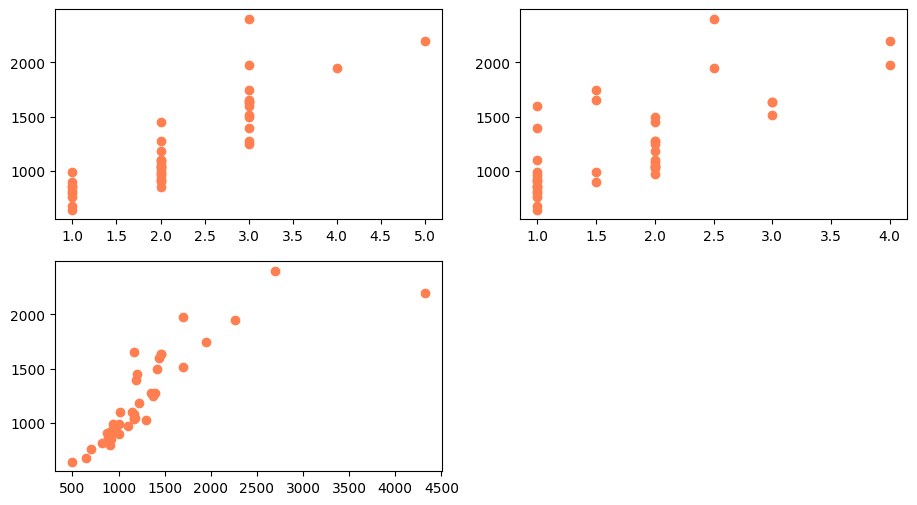

In [ ]:
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.plot(df['Beds'], df['Rent'], 'o', color = 'coral')
ax2.plot(df['Baths'], df['Rent'], 'o', color = 'coral')
ax3.plot(df['Sqft'], df['Rent'], 'o', color = 'coral')
plt.show()

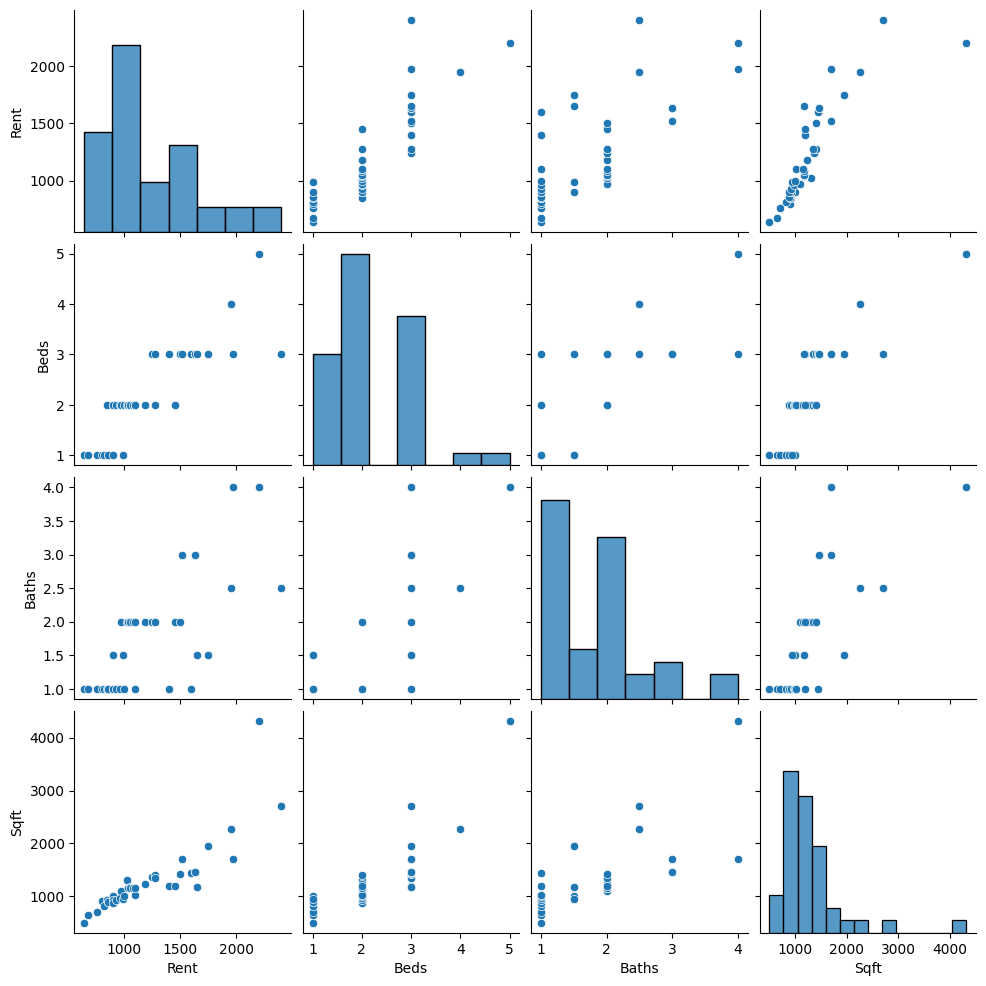

In [ ]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(df)
plt.show()

In [ ]:
# 전체 데이터
X = df.loc[:,'Beds':'Sqft']
y = df['Rent']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (40, 3)
y 데이터:  (40,)


In [ ]:
# 로그변환 = 밑이 자연상수인 자연로그 = ln
X['log_Sqft'] = np.log(X['Sqft'])
log_y = np.log(y)

In [ ]:
X.head()

,Beds,Baths,Sqft,log_Sqft
0,1,1.0,500,6.214608
1,1,1.0,648,6.473891
2,1,1.0,700,6.551080
3,1,1.0,903,6.805723
4,1,1.0,817,6.705639


In [ ]:
X1 = X.iloc[:,[0,1,2]]
X2 = X.iloc[:,[0,1,3]]
X3 = X.iloc[:,[0,1,2]]
X4 = X.iloc[:,[0,1,3]]

In [ ]:
log_y[:5]

0    6.469250
1    6.514713
2    6.633318
3    6.684612
4    6.709304
Name: Rent, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
# 다중선형회귀
m1 = LinearRegression();m1.fit(X1, y)
# 로그회귀
m2 = LinearRegression();m2.fit(X2, y)
# 지수회귀
m3 = LinearRegression();m3.fit(X3, log_y)
# 로그로그회귀
m4 = LinearRegression();m4.fit(X4, log_y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)
# m1 < m2
m3_r2 = m3.score(X3, log_y);print(m3_r2)
m4_r2 = m4.score(X4, log_y);print(m4_r2)
# m3 < m4

# model2 ? model4

0.809150858454385
0.8481954711407629
0.8095439514833833
0.8612914860485903


In [ ]:
# 예측값
y_pred4 = m4.predict(X4)

In [ ]:
# 표준오차 = RMSE(log y, y hat)
from sklearn.metrics import mean_squared_error
se = mean_squared_error(log_y, y_pred4, squared = False)
# 분산 = MSE(log y, y hat)

In [ ]:
y_pred4 = np.exp(y_pred4 + se**2/2)

In [ ]:
# 수정된 결정계수
from scipy.stats import pearsonr
pearsonr(y, y_pred4)[0]**2
# m2 > m4

0.7554187914903032

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)
intercept3 = round(m3.intercept_, 5);print(intercept3)
intercept4 = round(m4.intercept_, 5);print(intercept4)

300.4116
-3909.74153
6.32938
3.38084


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)
slope3 = [round(x, 4) for x in m3.coef_];print(slope3)
slope4 = [round(x, 4) for x in m4.coef_];print(slope4)

[225.81, 89.2661, 0.2096]
[131.7781, 36.4255, 675.2648]
[0.2262, 0.0831, 0.0001]
[0.1246, 0.0254, 0.4742]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X3.columns, slope3):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X4.columns, slope4):
  print("{}: {}".format(name, coef))

Beds: 225.81
Baths: 89.2661
Sqft: 0.2096

Beds: 131.7781
Baths: 36.4255
log_Sqft: 675.2648

Beds: 0.2262
Baths: 0.0831
Sqft: 0.0001

Beds: 0.1246
Baths: 0.0254
log_Sqft: 0.4742


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)
equation3 = "y_hat = " + str(intercept3)
for coef, name in zip(slope3, X3.columns):
  equation3 += " + {} * {}".format(coef, name)
print(equation3)
equation4 = "y_hat = " + str(intercept4)
for coef, name in zip(slope4, X4.columns):
  equation4 += " + {} * {}".format(coef, name)
print(equation4)

y_hat = 300.4116 + 225.81 * Beds + 89.2661 * Baths + 0.2096 * Sqft
y_hat = -3909.74153 + 131.7781 * Beds + 36.4255 * Baths + 675.2648 * log_Sqft
y_hat = 6.32938 + 0.2262 * Beds + 0.0831 * Baths + 0.0001 * Sqft
y_hat = 3.38084 + 0.1246 * Beds + 0.0254 * Baths + 0.4742 * log_Sqft


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print("")
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))

183.24681405135237
134.4319697046623

163.43071902726118
127.22455268237982


In [ ]:
y_pred3 = m3.predict(X3)
y_pred4 = m4.predict(X4)

In [ ]:
# 표준오차 = RMSE(log y, y hat)
se3 = mean_squared_error(log_y, y_pred3, squared = False)
se4 = mean_squared_error(log_y, y_pred4, squared = False)
print(se3, se4)
# 분산 = MSE(log y, y hat)

0.14029135225409847 0.11972506349997702


In [ ]:
y_pred3 = np.exp(y_pred3 + se3**2/2)
y_pred4 = np.exp(y_pred4 + se4**2/2)

In [ ]:
print(mean_squared_error(y, y_pred3, squared = False))
print(mean_absolute_error(y, y_pred3))
print("")
print(mean_squared_error(y, y_pred4, squared = False))
print(mean_absolute_error(y, y_pred4))

243.96242593795165
151.38475746191727

221.32278986763313
132.73884553905614


In [ ]:
# 침실 수가 3개이고 욕실 수가 2개인 1,600 ft2인 주택의 임대료를 예측
Beds = 3;Baths = 2;Sqft = 1600
y_hat = 300.4116 + 225.81 * Beds + 89.2661 * Baths + 0.2096 * Sqft
y_hat

1491.7338

In [ ]:
Beds = 3;Baths = 2;Sqft = 1600;log_Sqft = np.log(Sqft)
y_hat = -3909.74153 + 131.7781 * Beds + 36.4255 * Baths + 675.2648 * log_Sqft
y_hat

1540.3846636127132

In [ ]:
Beds = 3;Baths = 2;Sqft = 1600
y_hat = np.exp(6.32938 + 0.2262 * Beds + 0.0831 * Baths + 0.0001 * Sqft + se3**2/2)
y_hat

1546.9195289871072

In [ ]:
Beds = 3;Baths = 2;Sqft = 1600;log_Sqft = np.log(Sqft)
y_hat =np.exp(3.38084 + 0.1246 * Beds + 0.0254 * Baths + 0.4742 * log_Sqft + se4**2/2)
y_hat

1496.8831416710846

# 고차항

## 2차식 회귀

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/wages.xlsx', engine = 'openpyxl')
df.head()
# 시간당 임금, 교육연수, 연령

,Wage,Educ,Age
0,17.54,12,76
1,20.93,10,61
2,12.94,8,75
3,19.34,6,38
4,24.12,12,59


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wage    80 non-null     float64
 1   Educ    80 non-null     int64  
 2   Age     80 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


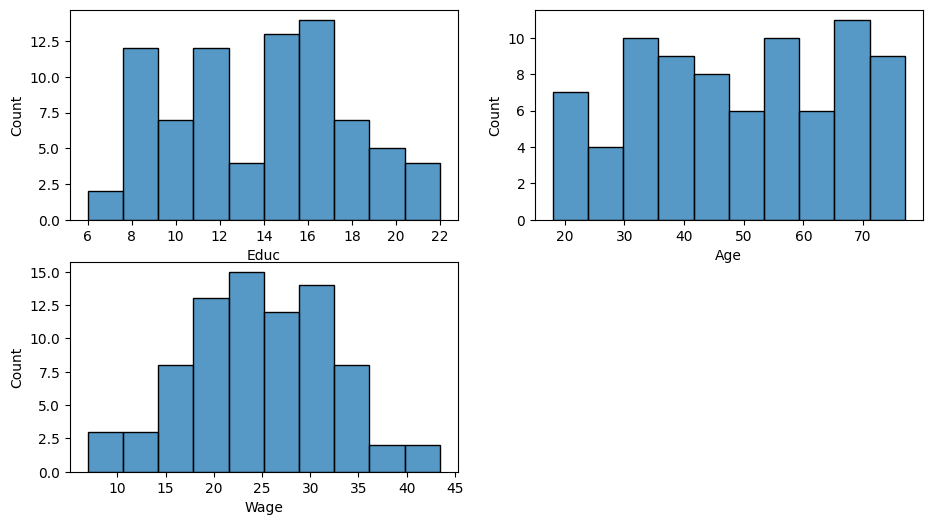

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 6])
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(df['Educ'], bins = 10, ax = ax1)
sns.histplot(df['Age'], bins = 10, ax = ax2)
sns.histplot(df['Wage'], bins = 10, ax = ax3)
plt.show()

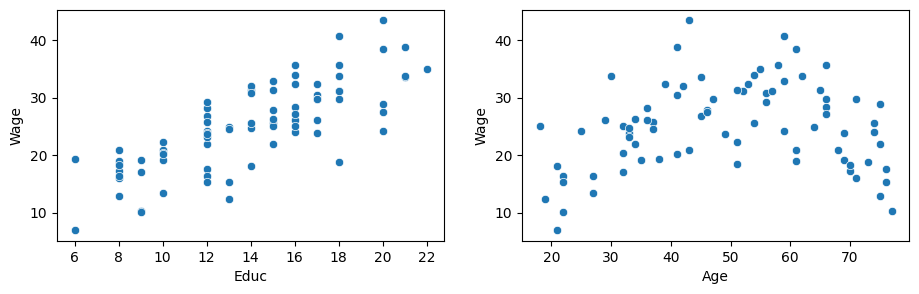

In [ ]:
# 산점도
fig = plt.figure(figsize=(11, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.scatterplot(x = 'Educ', y = 'Wage', data = df, ax = ax1)
sns.scatterplot(x = 'Age', y = 'Wage', data = df, ax = ax2)
plt.show()

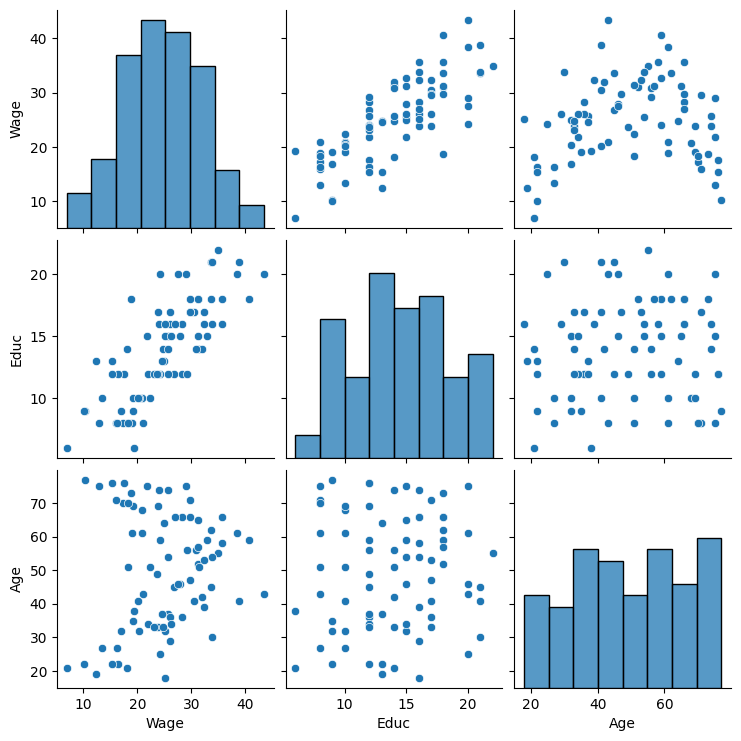

In [ ]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(df)
plt.show()

In [ ]:
# 전체 데이터
X = df.loc[:,['Educ', 'Age']]
y = df['Wage']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (80, 2)
y 데이터:  (80,)


In [ ]:
X['Age2'] = X['Age'] ** 2

In [ ]:
X.head()

,Educ,Age,Age2
0,12,76,5776
1,10,61,3721
2,8,75,5625
3,6,38,1444
4,12,59,3481


In [ ]:
X1 = X.iloc[:, [0,1]]
X2 = X.iloc[:, [0,1,2]]

In [ ]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)

0.6186943830264384
0.8323164285980976


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)

0.6087903410271251
0.8256973402532857


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)

2.63808
-22.72194


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)

[1.441, 0.0472]
[1.254, 1.35, -0.0133]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))

Educ: 1.441
Age: 0.0472

Educ: 1.254
Age: 1.35
Age2: -0.0133


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

y_hat = 2.63808 + 1.441 * Educ + 0.0472 * Age
y_hat = -22.72194 + 1.254 * Educ + 1.35 * Age + -0.0133 * Age2


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))

4.589926369939689
3.5369243121120335
3.0437878208474958
2.313619206289116


In [ ]:
Educ = 16
age_list = [30,50,70]
for Age in age_list:
  y1 = round(2.63808 + 1.441 * Educ + 0.0472 * Age, 4)
  y2 = round(-22.72194 + 1.254 * Educ + 1.35 * Age + -0.0133 * Age ** 2, 4)
  print(Age, y1, y2)

30 27.1101 25.8721
50 28.0541 31.5921
70 28.9981 26.6721


In [ ]:
Educ = 16
age_list = []
wage_list = []
for Age in range(20, 80+1):
  wage = round(-22.72194 + 1.254 * Educ + 1.35 * Age + -0.0133 * Age ** 2, 4)
  age_list.append(Age)
  wage_list.append(wage)

In [ ]:
df_age_wage = pd.DataFrame({'age': age_list,
                   'wage': wage_list})
df_age_wage.head()

,age,wage
0,20,19.0221
1,21,19.8268
2,22,20.6049
3,23,21.3564
4,24,22.0813


In [ ]:
df_age_wage['wage'].max()

31.5988

In [ ]:
df_age_wage[df_age_wage['wage'] == df_age_wage['wage'].max()]

,age,wage
31,51,31.5988


In [ ]:
max_age = df_age_wage[df_age_wage['wage'] == df_age_wage['wage'].max()]['age'].values
max_age

array([51])

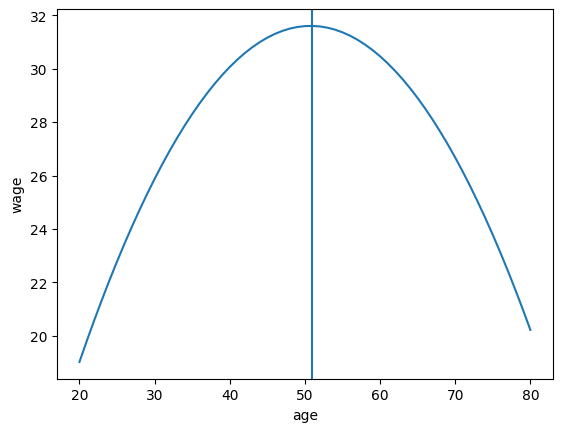

In [ ]:
sns.lineplot(x = 'age', y = 'wage', data = df_age_wage)
plt.axvline(x = max_age)
plt.show()

## 3차식 회귀

In [ ]:
df.head()

,Wage,Educ,Age
0,17.54,12,76
1,20.93,10,61
2,12.94,8,75
3,19.34,6,38
4,24.12,12,59


In [ ]:
# 전체 데이터
X = df.loc[:,['Educ', 'Age']]
y = df['Wage']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (80, 2)
y 데이터:  (80,)


In [ ]:
X['Age2'] = X['Age'] ** 2
X['Age3'] = X['Age'] ** 3

In [ ]:
X.head()

,Educ,Age,Age2,Age3
0,12,76,5776,438976
1,10,61,3721,226981
2,8,75,5625,421875
3,6,38,1444,54872
4,12,59,3481,205379


In [ ]:
X1 = X.iloc[:, [0,1]]
X2 = X.iloc[:, [0,1,2]]
X3 = X.iloc[:, [0,1,2,3]]

In [ ]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)
m3 = LinearRegression();m3.fit(X3, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)
m3_r2 = m3.score(X3, y);print(m3_r2)

0.6186943830264384
0.8323164285980976
0.8382902960224632


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)
m3_ar2 = 1 - (1 - m3_r2) * ((len(X) - 1)/(len(X) - X3.shape[1] - 1));print(m3_ar2)

0.6087903410271251
0.8256973402532857
0.8296657784769945


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)
intercept3 = round(m3.intercept_, 5);print(intercept3)

2.63808
-22.72194
-10.76372


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)
slope3 = [round(x, 4) for x in m3.coef_];print(slope3)

[1.441, 0.0472]
[1.254, 1.35, -0.0133]
[1.2416, 0.4647, 0.0067, -0.0001]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X3.columns, slope3):
  print("{}: {}".format(name, coef))

Educ: 1.441
Age: 0.0472

Educ: 1.254
Age: 1.35
Age2: -0.0133

Educ: 1.2416
Age: 0.4647
Age2: 0.0067
Age3: -0.0001


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)
equation3 = "y_hat = " + str(intercept3)
for coef, name in zip(slope3, X3.columns):
  equation3 += " + {} * {}".format(coef, name)
print(equation3)

y_hat = 2.63808 + 1.441 * Educ + 0.0472 * Age
y_hat = -22.72194 + 1.254 * Educ + 1.35 * Age + -0.0133 * Age2
y_hat = -10.76372 + 1.2416 * Educ + 0.4647 * Age + 0.0067 * Age2 + -0.0001 * Age3


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)
y_pred3 = m3.predict(X3)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))
print(mean_squared_error(y, y_pred3, squared = False))
print(mean_absolute_error(y, y_pred3))

4.589926369939689
3.5369243121120335
3.0437878208474958
2.313619206289116
2.989077382643722
2.3063091176763137


## 2차식 회귀 - 특성공학

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wage    80 non-null     float64
 1   Educ    80 non-null     int64  
 2   Age     80 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


In [ ]:
# 전체 데이터
X = df.loc[:,['Educ', 'Age']]
y = df['Wage']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (80, 2)
y 데이터:  (80,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)

print("X 데이터: ", X.shape)
print("X_poly 데이터: ", X_poly.shape)

X 데이터:  (80, 2)
X_poly 데이터:  (80, 5)


In [ ]:
poly.get_feature_names_out()

array(['Educ', 'Age', 'Educ^2', 'Educ Age', 'Age^2'], dtype=object)

In [ ]:
print(X.loc[0])
print(X_poly[0])

Educ    12
Age     76
Name: 0, dtype: int64
[  12.   76.  144.  912. 5776.]


In [ ]:
X_poly_df = pd.DataFrame(X_poly)
X_poly_df.head()

,0,1,2,3,4
0,12.0,76.0,144.0,912.0,5776.0
1,10.0,61.0,100.0,610.0,3721.0
2,8.0,75.0,64.0,600.0,5625.0
3,6.0,38.0,36.0,228.0,1444.0
4,12.0,59.0,144.0,708.0,3481.0


In [ ]:
X_poly_df = X_poly_df.iloc[:,[0,1,4]]
X_poly_df.columns = ['Educ', 'Age', 'Age2']

In [ ]:
X_poly_df.head()

,Educ,Age,Age2
0,12.0,76.0,5776.0
1,10.0,61.0,3721.0
2,8.0,75.0,5625.0
3,6.0,38.0,1444.0
4,12.0,59.0,3481.0


In [ ]:
X1 = X_poly_df.iloc[:, [0,1]]
X2 = X_poly_df.iloc[:, [0,1,2]]

In [ ]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)

0.6186943830264384
0.8323164285980976


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)

0.6087903410271251
0.8256973402532857


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)

2.63808
-22.72194


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)

[1.441, 0.0472]
[1.254, 1.35, -0.0133]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))

Educ: 1.441
Age: 0.0472

Educ: 1.254
Age: 1.35
Age2: -0.0133


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

y_hat = 2.63808 + 1.441 * Educ + 0.0472 * Age
y_hat = -22.72194 + 1.254 * Educ + 1.35 * Age + -0.0133 * Age2


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))

4.589926369939689
3.5369243121120335
3.0437878208474958
2.313619206289116


## 3차식 회귀 - 특성공학

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wage    80 non-null     float64
 1   Educ    80 non-null     int64  
 2   Age     80 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


In [ ]:
# 전체 데이터
X = df.loc[:,['Educ', 'Age']]
y = df['Wage']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (80, 2)
y 데이터:  (80,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly.fit_transform(X)

print("X 데이터: ", X.shape)
print("X_poly 데이터: ", X_poly.shape)

X 데이터:  (80, 2)
X_poly 데이터:  (80, 9)


In [ ]:
poly.get_feature_names_out()

array(['Educ', 'Age', 'Educ^2', 'Educ Age', 'Age^2', 'Educ^3',
       'Educ^2 Age', 'Educ Age^2', 'Age^3'], dtype=object)

In [ ]:
print(X.loc[0])
print(X_poly[0])

Educ    12
Age     76
Name: 0, dtype: int64
[    12.     76.    144.    912.   5776.   1728.  10944.  69312. 438976.]


In [ ]:
X_poly_df = pd.DataFrame(X_poly)
X_poly_df.head()

,0,1,2,3,4,5,6,7,8
0,12.0,76.0,144.0,912.0,5776.0,1728.0,10944.0,69312.0,438976.0
1,10.0,61.0,100.0,610.0,3721.0,1000.0,6100.0,37210.0,226981.0
2,8.0,75.0,64.0,600.0,5625.0,512.0,4800.0,45000.0,421875.0
3,6.0,38.0,36.0,228.0,1444.0,216.0,1368.0,8664.0,54872.0
4,12.0,59.0,144.0,708.0,3481.0,1728.0,8496.0,41772.0,205379.0


In [ ]:
X_poly_df = X_poly_df.iloc[:,[0,1,4,8]]
X_poly_df.columns = ['Educ', 'Age', 'Age2', 'Age3']

In [ ]:
X_poly_df.head()

,Educ,Age,Age2,Age3
0,12.0,76.0,5776.0,438976.0
1,10.0,61.0,3721.0,226981.0
2,8.0,75.0,5625.0,421875.0
3,6.0,38.0,1444.0,54872.0
4,12.0,59.0,3481.0,205379.0


In [ ]:
X1 = X_poly_df.iloc[:, [0,1]]
X2 = X_poly_df.iloc[:, [0,1,2]]
X3 = X_poly_df.iloc[:, [0,1,2,3]]

In [ ]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)
m3 = LinearRegression();m3.fit(X3, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
m1_r2 = m1.score(X1, y);print(m1_r2)
m2_r2 = m2.score(X2, y);print(m2_r2)
m3_r2 = m3.score(X3, y);print(m3_r2)

0.6186943830264384
0.8323164285980976
0.8382902960224632


In [ ]:
# 조정결정계수
m1_ar2 = 1 - (1 - m1_r2) * ((len(X) - 1)/(len(X) - X1.shape[1] - 1));print(m1_ar2)
m2_ar2 = 1 - (1 - m2_r2) * ((len(X) - 1)/(len(X) - X2.shape[1] - 1));print(m2_ar2)
m3_ar2 = 1 - (1 - m3_r2) * ((len(X) - 1)/(len(X) - X3.shape[1] - 1));print(m3_ar2)

0.6087903410271251
0.8256973402532857
0.8296657784769945


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 5);print(intercept1)
intercept2 = round(m2.intercept_, 5);print(intercept2)
intercept3 = round(m3.intercept_, 5);print(intercept3)

2.63808
-22.72194
-10.76372


In [ ]:
# 기울기
slope1 = [round(x, 4) for x in m1.coef_];print(slope1)
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)
slope3 = [round(x, 4) for x in m3.coef_];print(slope3)

[1.441, 0.0472]
[1.254, 1.35, -0.0133]
[1.2416, 0.4647, 0.0067, -0.0001]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X3.columns, slope3):
  print("{}: {}".format(name, coef))

Educ: 1.441
Age: 0.0472

Educ: 1.254
Age: 1.35
Age2: -0.0133

Educ: 1.2416
Age: 0.4647
Age2: 0.0067
Age3: -0.0001


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)
equation3 = "y_hat = " + str(intercept3)
for coef, name in zip(slope3, X3.columns):
  equation3 += " + {} * {}".format(coef, name)
print(equation3)

y_hat = 2.63808 + 1.441 * Educ + 0.0472 * Age
y_hat = -22.72194 + 1.254 * Educ + 1.35 * Age + -0.0133 * Age2
y_hat = -10.76372 + 1.2416 * Educ + 0.4647 * Age + 0.0067 * Age2 + -0.0001 * Age3


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)
y_pred3 = m3.predict(X3)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred1, squared = False))
print(mean_absolute_error(y, y_pred1))
print(mean_squared_error(y, y_pred2, squared = False))
print(mean_absolute_error(y, y_pred2))
print(mean_squared_error(y, y_pred3, squared = False))
print(mean_absolute_error(y, y_pred3))

4.589926369939689
3.5369243121120335
3.0437878208474958
2.313619206289116
2.989077382643722
2.3063091176763137


# 데이터 분할

## 단순회귀분석

In [ ]:
pd.read_csv('/content/drive/MyDrive/lsda02/data/auto-mpg.csv')

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/auto-mpg.csv', header = None)
df.head()
# 1) mpg: 연비
# 2) cylinders: 실린더 개수
# 3) displacement: 배기량
# 4) horsepower: 마력
# 5) weight: 무게
# 6) acceleration: 엔진이 초당 얻을 수 있는 가속력
# 7) model year: 출시 년도
# 8) origin: 제조 장소(1: 미국 USA, 2: 유럽 EU, 3: 일본 JPN)
# 9) car name: 자동차 이름

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',  'acceleration', 'model_year', 'origin', 'car_name']

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 전처리
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# ? 데이터 확인
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [ ]:
# ? 를 NaN 으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df['horsepower'].isnull().sum()

6

In [ ]:
# NaN 삭제 후 float 로 변환
df = df.dropna(subset = ['horsepower'], axis = 0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.shape

(392, 9)

In [ ]:
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 392, dtype: object

In [ ]:
df['horsepower'] = df['horsepower'].astype('float')
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

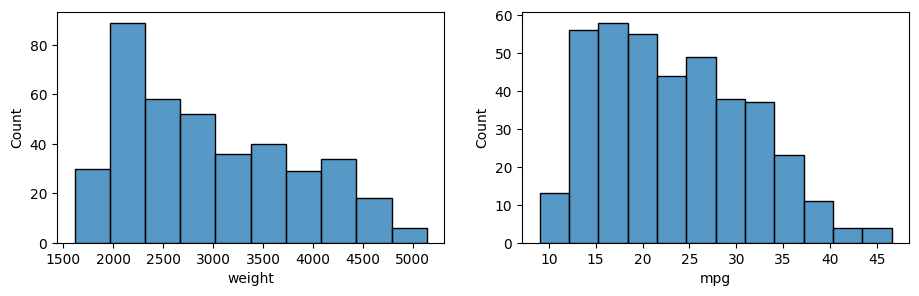

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['weight'], ax = ax1)
sns.histplot(df['mpg'], ax = ax2)
plt.show()

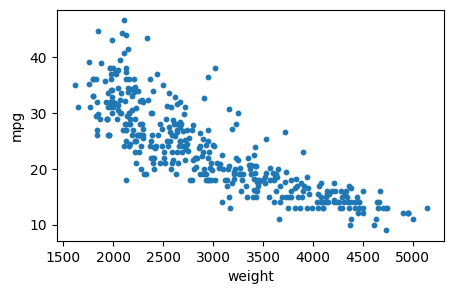

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'weight',
        y = 'mpg',
        s = 10,
        figsize = (5,3))
plt.show()

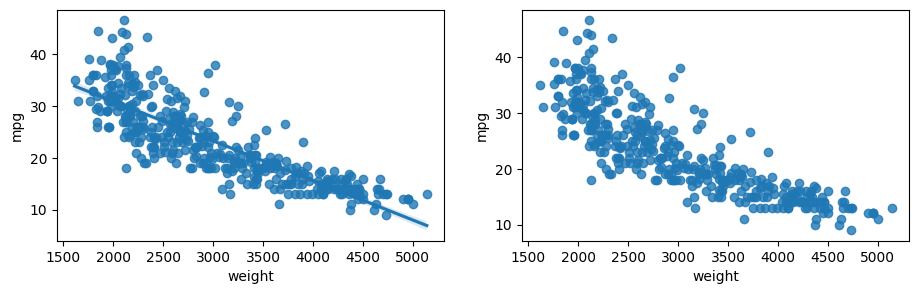

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'weight', y = 'mpg', data = df, ax = ax1)
sns.regplot(x = 'weight', y = 'mpg', data = df, fit_reg = False, ax = ax2)
plt.show()

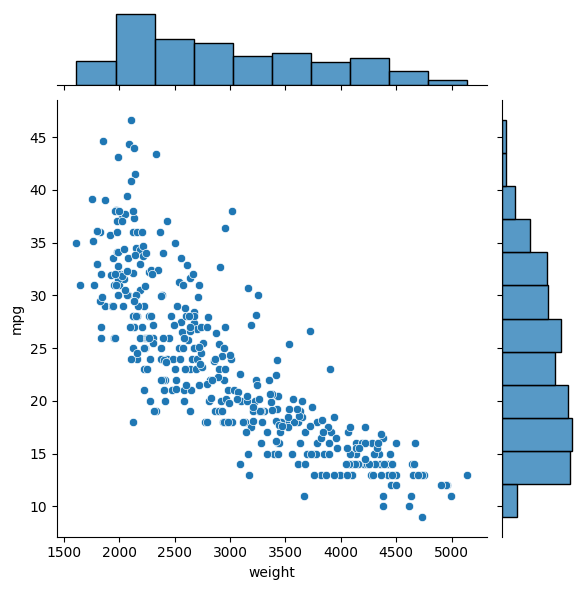

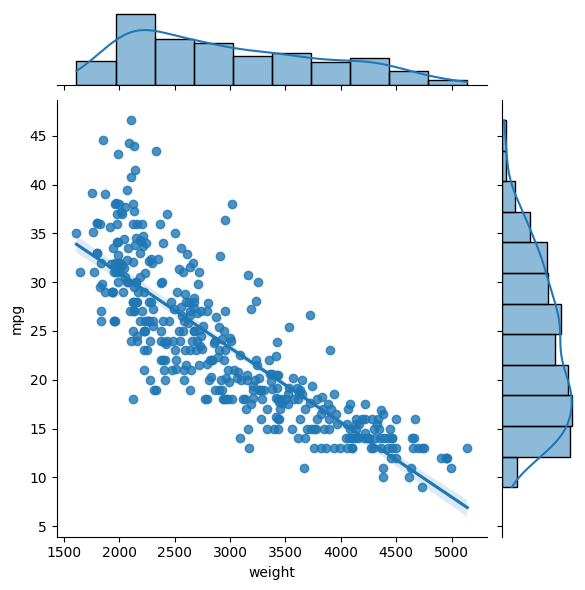

In [ ]:
# 조인트 그림
sns.jointplot(x = 'weight', y = 'mpg', data = df)
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', data = df)
plt.show()

In [ ]:
# 전체 데이터
X = df[['weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 1)
y 데이터:  (392,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 1)
test 데이터:  (118, 1)


In [ ]:
392 * 0.7

274.4

In [ ]:
392 * 0.3

117.6

In [ ]:
# 단순선형회귀모델
from sklearn.linear_model import LinearRegression
sr = LinearRegression()
# 모델 훈련
sr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(sr.score(X_train, y_train))
print(sr.score(X_test, y_test))

0.6983795669216758
0.6653479018765671


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = round(sr.intercept_, 4);intercept

47.484

In [ ]:
# 기울기
slope = [round(x, 4) for x in sr.coef_];print(slope)

[-0.008]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

weight: -0.008


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 47.484 + -0.008 * weight


In [ ]:
# 결정계수
train_r2 = round(sr.score(X_train, y_train), 3)
train_rsquared = "train R squared = " + str(train_r2)
train_rsquared

'train R squared = 0.698'

In [ ]:
y_train_pred = sr.predict(X_train)

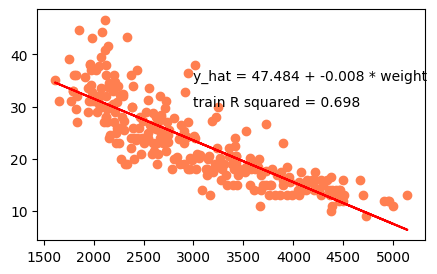

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X_train, y_train, 'o', color = 'coral')
plt.plot(X_train, y_train_pred, color = 'red')
plt.text(3000, 35, equation)
plt.text(3000, 30, train_rsquared)
plt.show()

In [ ]:
# 결정계수
test_r2 = round(sr.score(X_test, y_test), 3)
test_rsquared = "test R squared = " + str(test_r2)
test_rsquared

'test R squared = 0.665'

In [ ]:
y_test_pred = sr.predict(X_test)

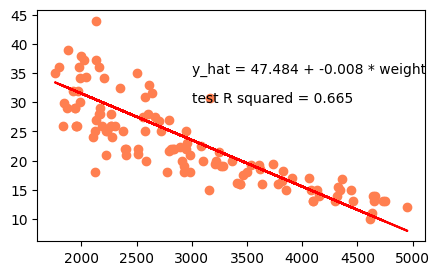

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X_test, y_test, 'o', color = 'coral')
plt.plot(X_test, y_test_pred, color = 'red')
plt.text(3000, 35, equation)
plt.text(3000, 30, test_rsquared)
plt.show()

In [ ]:
y_train_pred = sr.predict(X_train)
y_test_pred = sr.predict(X_test)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  4.3944481183678095
test RMSE:  4.207696791616965
train MAE:  3.3172441527806895
test MAE:  3.3814786566324364


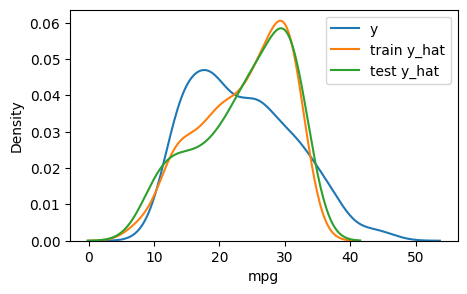

In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
plt.figure(figsize=(5,3))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_train_pred, label="train y_hat", ax=ax1)
ax3 = sns.kdeplot(y_test_pred, label="test y_hat", ax=ax1)
plt.legend()
plt.show()

## 다중회귀분석

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

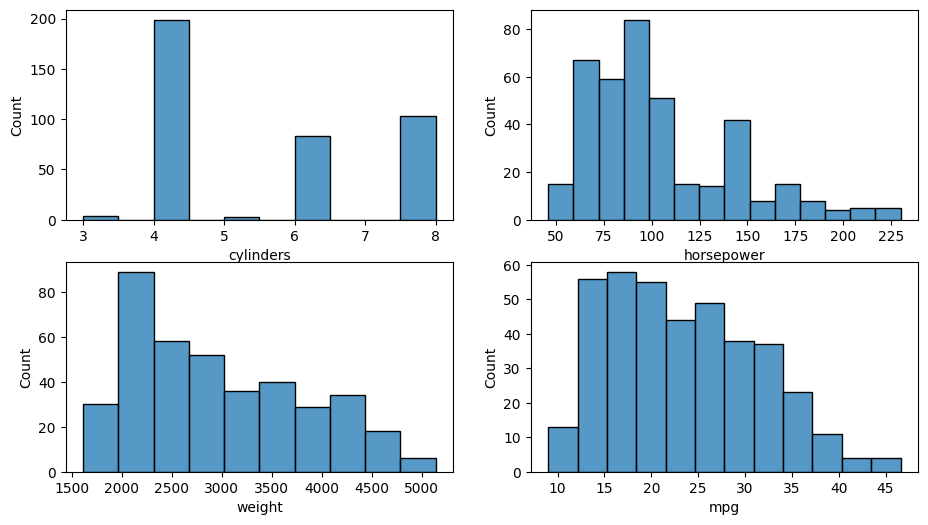

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 6])
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(df['cylinders'], ax = ax1)
sns.histplot(df['horsepower'], ax = ax2)
sns.histplot(df['weight'], ax = ax3)
sns.histplot(df['mpg'], ax = ax4)
plt.show()

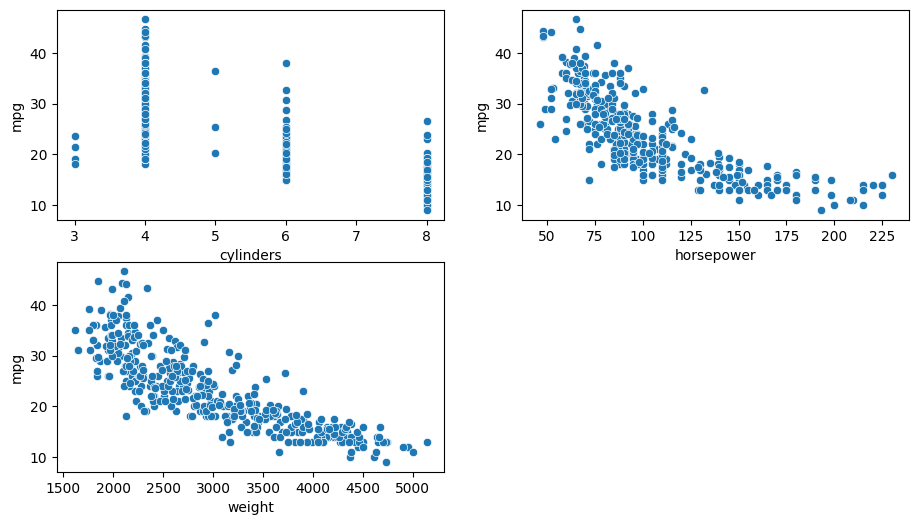

In [ ]:
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

sns.scatterplot(x = 'cylinders', y = 'mpg', data = df, ax = ax1)
sns.scatterplot(x = 'horsepower', y = 'mpg', data = df, ax = ax2)
sns.scatterplot(x = 'weight', y = 'mpg', data = df, ax = ax3)
plt.show()

In [ ]:
# 전체 데이터
X = df.loc[:, ['cylinders', 'horsepower', 'weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 3)
y 데이터:  (392,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 3)
test 데이터:  (118, 3)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(mr.score(X_train, y_train))
print(mr.score(X_test, y_test))

0.7222535897660474
0.6516756050160641


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = mr.intercept_;intercept

46.90562407302214

In [ ]:
# 기울기
slope = [round(x, 4) for x in mr.coef_];print(slope)

[-0.4437, -0.0539, -0.0051]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

cylinders: -0.4437
horsepower: -0.0539
weight: -0.0051


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 46.90562407302214 + -0.4437 * cylinders + -0.0539 * horsepower + -0.0051 * weight


In [ ]:
y_train_pred = mr.predict(X_train)
y_test_pred = mr.predict(X_test)

In [ ]:
print(y_train_pred[:5])
print(y_test_pred[:5])

[27.9746 26.5162 27.8031 25.9365 21.902 ]
[30.2885 24.7285 32.7501 31.4233 26.3183]


In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  4.2169474512685
test RMSE:  4.292789632445424
train MAE:  3.196509362731315
test MAE:  3.5300608395436655


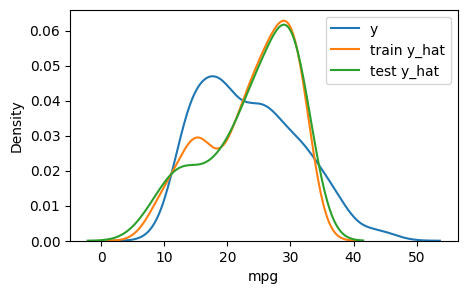

In [ ]:
# 실제값과 예측값 비교
plt.figure(figsize = (5, 3))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_train_pred, label = "train y_hat", ax = ax1)
ax3 = sns.kdeplot(y_test_pred, label = "test y_hat", ax = ax1)
plt.legend()
plt.show()

## 다항회귀분석 - 2차

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:, ['cylinders', 'horsepower', 'weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 3)
y 데이터:  (392,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)

print("X 데이터: ", X.shape)
print("X_poly 데이터: ", X_poly.shape)

X 데이터:  (392, 3)
X_poly 데이터:  (392, 9)


In [ ]:
poly.get_feature_names_out()

array(['cylinders', 'horsepower', 'weight', 'cylinders^2',
       'cylinders horsepower', 'cylinders weight', 'horsepower^2',
       'horsepower weight', 'weight^2'], dtype=object)

In [ ]:
print(X.loc[0])
print(X_poly[0])

cylinders        8.0
horsepower     130.0
weight        3504.0
Name: 0, dtype: float64
[       8.      130.     3504.       64.     1040.    28032.    16900.
   455520. 12278016.]


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 9)
test 데이터:  (118, 9)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(mr.score(X_train, y_train))
print(mr.score(X_test, y_test))

0.7758989011142217
0.6788926840905897


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = mr.intercept_;intercept

75.55879270670457

In [ ]:
# 기울기
slope = [round(x, 4) for x in mr.coef_];print(slope)

[-5.2176, -0.3193, -0.0064, -0.0678, 0.0221, 0.001, 0.0003, 0.0, -0.0]


In [ ]:
X_poly_columns = poly.get_feature_names_out()

In [ ]:
for name, coef in zip(X_poly_columns, slope):
  print("{}: {}".format(name, coef))

cylinders: -5.2176
horsepower: -0.3193
weight: -0.0064
cylinders^2: -0.0678
cylinders horsepower: 0.0221
cylinders weight: 0.001
horsepower^2: 0.0003
horsepower weight: 0.0
weight^2: -0.0


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X_poly_columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 75.55879270670457 + -5.2176 * cylinders + -0.3193 * horsepower + -0.0064 * weight + -0.0678 * cylinders^2 + 0.0221 * cylinders horsepower + 0.001 * cylinders weight + 0.0003 * horsepower^2 + 0.0 * horsepower weight + -0.0 * weight^2


In [ ]:
y_train_pred = mr.predict(X_train)
y_test_pred = mr.predict(X_test)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  3.7878777570690687
test RMSE:  4.121665669678253
train MAE:  2.7559833502329867
test MAE:  3.0479084592000314


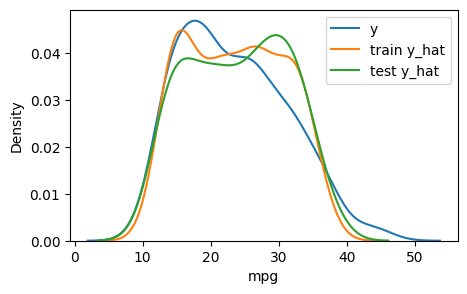

In [ ]:
# 실제값과 예측값 비교
plt.figure(figsize = (5, 3))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_train_pred, label = "train y_hat", ax = ax1)
ax3 = sns.kdeplot(y_test_pred, label = "test y_hat", ax = ax1)
plt.legend()
plt.show()

## 다항회귀분석 - 5차

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:, ['cylinders', 'horsepower', 'weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 3)
y 데이터:  (392,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식
poly = PolynomialFeatures(degree = 5, include_bias = False)
X_poly = poly.fit_transform(X)

print("X 데이터: ", X.shape)
print("X_poly 데이터: ", X_poly.shape)

X 데이터:  (392, 3)
X_poly 데이터:  (392, 55)


In [ ]:
poly.get_feature_names_out()

array(['cylinders', 'horsepower', 'weight', 'cylinders^2',
       'cylinders horsepower', 'cylinders weight', 'horsepower^2',
       'horsepower weight', 'weight^2', 'cylinders^3',
       'cylinders^2 horsepower', 'cylinders^2 weight',
       'cylinders horsepower^2', 'cylinders horsepower weight',
       'cylinders weight^2', 'horsepower^3', 'horsepower^2 weight',
       'horsepower weight^2', 'weight^3', 'cylinders^4',
       'cylinders^3 horsepower', 'cylinders^3 weight',
       'cylinders^2 horsepower^2', 'cylinders^2 horsepower weight',
       'cylinders^2 weight^2', 'cylinders horsepower^3',
       'cylinders horsepower^2 weight', 'cylinders horsepower weight^2',
       'cylinders weight^3', 'horsepower^4', 'horsepower^3 weight',
       'horsepower^2 weight^2', 'horsepower weight^3', 'weight^4',
       'cylinders^5', 'cylinders^4 horsepower', 'cylinders^4 weight',
       'cylinders^3 horsepower^2', 'cylinders^3 horsepower weight',
       'cylinders^3 weight^2', 'cylinders^2 horse

In [ ]:
print(X.loc[0])
print(X_poly[0])

cylinders        8.0
horsepower     130.0
weight        3504.0
Name: 0, dtype: float64
[8.0000e+00 1.3000e+02 3.5040e+03 6.4000e+01 1.0400e+03 2.8032e+04
 1.6900e+04 4.5552e+05 1.2278e+07 5.1200e+02 8.3200e+03 2.2426e+05
 1.3520e+05 3.6442e+06 9.8224e+07 2.1970e+06 5.9218e+07 1.5961e+09
 4.3022e+10 4.0960e+03 6.6560e+04 1.7940e+06 1.0816e+06 2.9153e+07
 7.8579e+08 1.7576e+07 4.7374e+08 1.2769e+10 3.4418e+11 2.8561e+08
 7.6983e+09 2.0750e+11 5.5929e+12 1.5075e+14 3.2768e+04 5.3248e+05
 1.4352e+07 8.6528e+06 2.3323e+08 6.2863e+09 1.4061e+08 3.7899e+09
 1.0215e+11 2.7534e+12 2.2849e+09 6.1586e+10 1.6600e+12 4.4743e+13
 1.2060e+15 3.7129e+10 1.0008e+12 2.6975e+13 7.2707e+14 1.9597e+16
 5.2823e+17]


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 55)
test 데이터:  (118, 55)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(mr.score(X_train, y_train))
print(mr.score(X_test, y_test))

0.7730720504093253
0.5734388491857022


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = mr.intercept_;intercept

59.087218322769964

In [ ]:
# 기울기
slope = [round(x, 4) for x in mr.coef_];print(slope)

[0.0009, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0001, -0.0012, 0.0, -0.0, -0.0, -0.0003, 0.0, 0.0, -0.0, 0.0003, -0.0, 0.0, -0.0, -0.0, -0.0001, -0.002, -0.0, 0.0001, 0.0, -0.0001, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0001, -0.0011, 0.0001, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0]


In [ ]:
X_poly_columns = poly.get_feature_names_out()

In [ ]:
for name, coef in zip(X_poly_columns, slope):
  print("{}: {}".format(name, coef))

cylinders: 0.0009
horsepower: -0.0
weight: -0.0
cylinders^2: -0.0
cylinders horsepower: -0.0
cylinders weight: -0.0
horsepower^2: -0.0001
horsepower weight: -0.0012
weight^2: 0.0
cylinders^3: -0.0
cylinders^2 horsepower: -0.0
cylinders^2 weight: -0.0003
cylinders horsepower^2: 0.0
cylinders horsepower weight: 0.0
cylinders weight^2: -0.0
horsepower^3: 0.0003
horsepower^2 weight: -0.0
horsepower weight^2: 0.0
weight^3: -0.0
cylinders^4: -0.0
cylinders^3 horsepower: -0.0001
cylinders^3 weight: -0.002
cylinders^2 horsepower^2: -0.0
cylinders^2 horsepower weight: 0.0001
cylinders^2 weight^2: 0.0
cylinders horsepower^3: -0.0001
cylinders horsepower^2 weight: 0.0
cylinders horsepower weight^2: -0.0
cylinders weight^3: 0.0
horsepower^4: 0.0
horsepower^3 weight: -0.0
horsepower^2 weight^2: 0.0
horsepower weight^3: -0.0
weight^4: 0.0
cylinders^5: -0.0
cylinders^4 horsepower: -0.0
cylinders^4 weight: 0.0001
cylinders^3 horsepower^2: -0.0011
cylinders^3 horsepower weight: 0.0001
cylinders^3 weigh

In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X_poly_columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 59.087218322769964 + 0.0009 * cylinders + -0.0 * horsepower + -0.0 * weight + -0.0 * cylinders^2 + -0.0 * cylinders horsepower + -0.0 * cylinders weight + -0.0001 * horsepower^2 + -0.0012 * horsepower weight + 0.0 * weight^2 + -0.0 * cylinders^3 + -0.0 * cylinders^2 horsepower + -0.0003 * cylinders^2 weight + 0.0 * cylinders horsepower^2 + 0.0 * cylinders horsepower weight + -0.0 * cylinders weight^2 + 0.0003 * horsepower^3 + -0.0 * horsepower^2 weight + 0.0 * horsepower weight^2 + -0.0 * weight^3 + -0.0 * cylinders^4 + -0.0001 * cylinders^3 horsepower + -0.002 * cylinders^3 weight + -0.0 * cylinders^2 horsepower^2 + 0.0001 * cylinders^2 horsepower weight + 0.0 * cylinders^2 weight^2 + -0.0001 * cylinders horsepower^3 + 0.0 * cylinders horsepower^2 weight + -0.0 * cylinders horsepower weight^2 + 0.0 * cylinders weight^3 + 0.0 * horsepower^4 + -0.0 * horsepower^3 weight + 0.0 * horsepower^2 weight^2 + -0.0 * horsepower weight^3 + 0.0 * weight^4 + -0.0 * cylinders^5 + -0.0 * cyli

In [ ]:
y_train_pred = mr.predict(X_train)
y_test_pred = mr.predict(X_test)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  3.811693367216782
test RMSE:  4.750488930518701
train MAE:  2.8110069696514333
test MAE:  3.6316202122044743


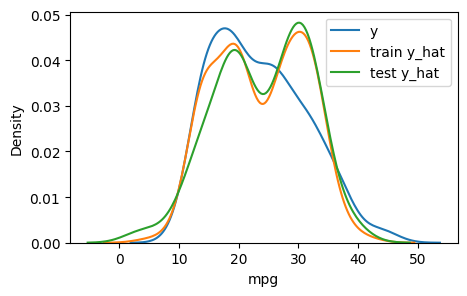

In [ ]:
# 실제값과 예측값 비교
plt.figure(figsize = (5, 3))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_train_pred, label = "train y_hat", ax = ax1)
ax3 = sns.kdeplot(y_test_pred, label = "test y_hat", ax = ax1)
plt.legend()
plt.show()

## 다중회귀분석 - 스케일링

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:, ['cylinders', 'horsepower', 'weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 3)
y 데이터:  (392,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 3)
test 데이터:  (118, 3)


In [ ]:
X_train.describe()

,cylinders,horsepower,weight
count,274.000000,274.000000,274.000000
mean,5.496350,104.883212,2986.485401
std,1.716646,38.134438,838.977833
min,3.000000,48.000000,1613.000000
25%,4.000000,76.250000,2245.250000
50%,4.000000,93.500000,2818.500000
75%,8.000000,130.000000,3625.750000
max,8.000000,230.000000,5140.000000


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)
# 전처리 객체 생성 - fit - transform(훈련) - transform(테스트)

In [ ]:
print(X_train_scale[:5])
print(X_test_scale[:5])

[[-0.8733 -0.2859 -0.7254]
 [ 0.2939 -0.5224 -0.477 ]
 [-0.8733 -0.3385 -0.6597]
 [ 0.2939 -0.391  -0.4042]
 [ 0.2939 -0.1283  0.4174]]
[[-0.8733 -0.9427 -0.9523]
 [-0.8733  0.2658 -0.2287]
 [-0.8733 -1.1791 -1.4168]
 [-0.8733 -0.9164 -1.2317]
 [-0.8733 -0.4961 -0.2346]]


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X_train_scale, y_train)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(mr.score(X_train_scale, y_train))
print(mr.score(X_test_scale, y_test))

0.7222535897660474
0.6516756050160644


In [ ]:
y_train_pred = mr.predict(X_train_scale)
y_test_pred = mr.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_test_pred[:5])

[27.9746 26.5162 27.8031 25.9365 21.902 ]
[30.2885 24.7285 32.7501 31.4233 26.3183]


In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  4.2169474512685
test RMSE:  4.292789632445423
train MAE:  3.1965093627313137
test MAE:  3.530060839543664


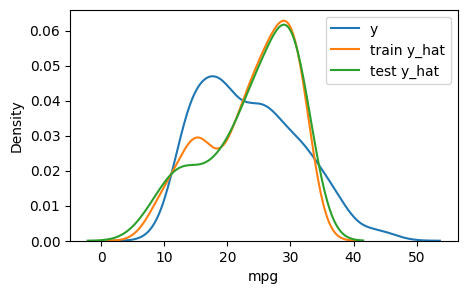

In [ ]:
# 실제값과 예측값 비교
plt.figure(figsize = (5, 3))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_train_pred, label = "train y_hat", ax = ax1)
ax3 = sns.kdeplot(y_test_pred, label = "test y_hat", ax = ax1)
plt.legend()
plt.show()

## 다항회귀분석 - 릿지 L2

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:, ['cylinders', 'horsepower', 'weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 3)
y 데이터:  (392,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                      test_size = 0.3,
                                                                      random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 3)
test 데이터:  (118, 3)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식
poly = PolynomialFeatures(degree = 5, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("X_train 데이터: ", X_train.shape)
print("X_train_poly 데이터: ", X_train_poly.shape)

X_train 데이터:  (274, 3)
X_train_poly 데이터:  (274, 55)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train_poly)
X_test_scale = standard.transform(X_test_poly)

In [ ]:
# 릿지
from sklearn.linear_model import Ridge
ridge = Ridge()
# 모델 훈련
ridge.fit(X_train_scale, y_train)

Ridge()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(ridge.score(X_train_scale, y_train))
print(ridge.score(X_test_scale, y_test))

0.7763873563181758
0.6833550248045738


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = ridge.intercept_;intercept

23.637591240875913

In [ ]:
# 기울기
slope = [round(x, 4) for x in ridge.coef_];print(slope)

[-0.8878, -6.3843, -2.4368, -1.7734, 0.2135, -1.0436, -0.5709, -1.853, -1.3697, -1.2949, 0.4679, -0.6121, 1.4977, 0.5964, -0.4372, 1.2961, 0.5156, -0.3162, -0.5862, -0.0917, -0.0063, 0.3247, 0.4584, 0.6282, 0.3052, 0.8148, 0.8857, 0.6101, 0.0612, 0.9118, 0.7835, 0.4265, 0.0482, -0.2111, 1.3761, -0.3652, 1.5854, -1.0306, 0.3635, 1.3276, -1.0485, -0.1373, 0.5472, 0.8109, -0.691, -0.2341, 0.1137, 0.3221, 0.2377, -0.1092, -0.0873, -0.1611, -0.1944, -0.1821, -0.2269]


In [ ]:
len(slope)

55

In [ ]:
X_poly_columns = poly.get_feature_names_out()

In [ ]:
for name, coef in zip(X_poly_columns, slope):
  print("{}: {}".format(name, coef))

cylinders: -0.8878
horsepower: -6.3843
weight: -2.4368
cylinders^2: -1.7734
cylinders horsepower: 0.2135
cylinders weight: -1.0436
horsepower^2: -0.5709
horsepower weight: -1.853
weight^2: -1.3697
cylinders^3: -1.2949
cylinders^2 horsepower: 0.4679
cylinders^2 weight: -0.6121
cylinders horsepower^2: 1.4977
cylinders horsepower weight: 0.5964
cylinders weight^2: -0.4372
horsepower^3: 1.2961
horsepower^2 weight: 0.5156
horsepower weight^2: -0.3162
weight^3: -0.5862
cylinders^4: -0.0917
cylinders^3 horsepower: -0.0063
cylinders^3 weight: 0.3247
cylinders^2 horsepower^2: 0.4584
cylinders^2 horsepower weight: 0.6282
cylinders^2 weight^2: 0.3052
cylinders horsepower^3: 0.8148
cylinders horsepower^2 weight: 0.8857
cylinders horsepower weight^2: 0.6101
cylinders weight^3: 0.0612
horsepower^4: 0.9118
horsepower^3 weight: 0.7835
horsepower^2 weight^2: 0.4265
horsepower weight^3: 0.0482
weight^4: -0.2111
cylinders^5: 1.3761
cylinders^4 horsepower: -0.3652
cylinders^4 weight: 1.5854
cylinders^3 ho

In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X_poly_columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 23.637591240875913 + -0.8878 * cylinders + -6.3843 * horsepower + -2.4368 * weight + -1.7734 * cylinders^2 + 0.2135 * cylinders horsepower + -1.0436 * cylinders weight + -0.5709 * horsepower^2 + -1.853 * horsepower weight + -1.3697 * weight^2 + -1.2949 * cylinders^3 + 0.4679 * cylinders^2 horsepower + -0.6121 * cylinders^2 weight + 1.4977 * cylinders horsepower^2 + 0.5964 * cylinders horsepower weight + -0.4372 * cylinders weight^2 + 1.2961 * horsepower^3 + 0.5156 * horsepower^2 weight + -0.3162 * horsepower weight^2 + -0.5862 * weight^3 + -0.0917 * cylinders^4 + -0.0063 * cylinders^3 horsepower + 0.3247 * cylinders^3 weight + 0.4584 * cylinders^2 horsepower^2 + 0.6282 * cylinders^2 horsepower weight + 0.3052 * cylinders^2 weight^2 + 0.8148 * cylinders horsepower^3 + 0.8857 * cylinders horsepower^2 weight + 0.6101 * cylinders horsepower weight^2 + 0.0612 * cylinders weight^3 + 0.9118 * horsepower^4 + 0.7835 * horsepower^3 weight + 0.4265 * horsepower^2 weight^2 + 0.0482 * horse

In [ ]:
y_train_pred = ridge.predict(X_train_scale)
y_test_pred = ridge.predict(X_test_scale)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  3.7837474384323713
test RMSE:  4.092926644427514
train MAE:  2.747583776577178
test MAE:  3.0593186509931694


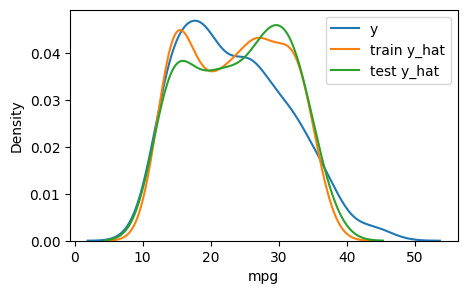

In [ ]:
# 실제값과 예측값 비교
plt.figure(figsize = (5, 3))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_train_pred, label = "train y_hat", ax = ax1)
ax3 = sns.kdeplot(y_test_pred, label = "test y_hat", ax = ax1)
plt.legend()
plt.show()

In [ ]:
# 규제조절 - 결정계수
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train_scale, y_train)
  train_score.append(ridge.score(X_train_scale, y_train))
  test_score.append(ridge.score(X_test_scale, y_test))

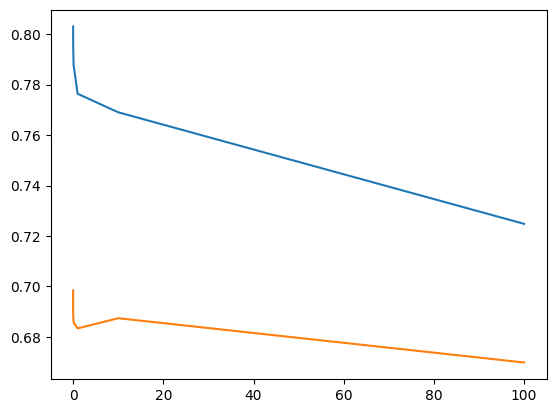

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.show()

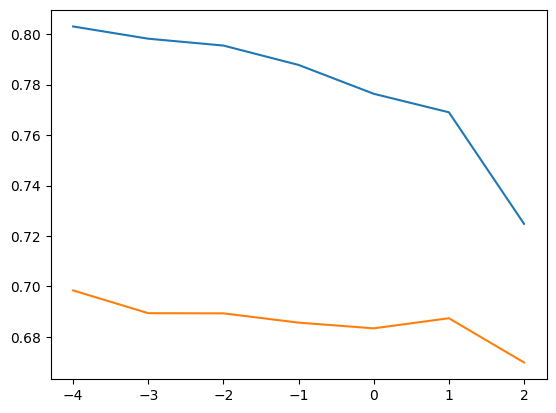

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
score_df = pd.DataFrame({'alpha': alpha_list,
                         'train_score': train_score,
                         'test_score': test_score})
score_df

,alpha,train_score,test_score
0,0.0001,0.803084,0.698386
1,0.0010,0.798235,0.689357
2,0.0100,0.795516,0.689294
3,0.1000,0.787826,0.685612
4,1.0000,0.776387,0.683355
5,10.0000,0.769046,0.687365
6,100.0000,0.724801,0.669810


In [ ]:
score_df['diff'] = score_df['train_score'] - score_df['test_score']

In [ ]:
score_df

,alpha,train_score,test_score,diff
0,0.0001,0.803084,0.698386,0.104698
1,0.0010,0.798235,0.689357,0.108878
2,0.0100,0.795516,0.689294,0.106221
3,0.1000,0.787826,0.685612,0.102214
4,1.0000,0.776387,0.683355,0.093032
5,10.0000,0.769046,0.687365,0.081680
6,100.0000,0.724801,0.669810,0.054991


In [ ]:
# 규제조절 - RMSE
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train_scale, y_train)
  y_train_pred = ridge.predict(X_train_scale)
  y_test_pred = ridge.predict(X_test_scale)
  train_score.append(mean_squared_error(y_train, y_train_pred, squared = False))
  test_score.append(mean_squared_error(y_test, y_test_pred, squared = False))

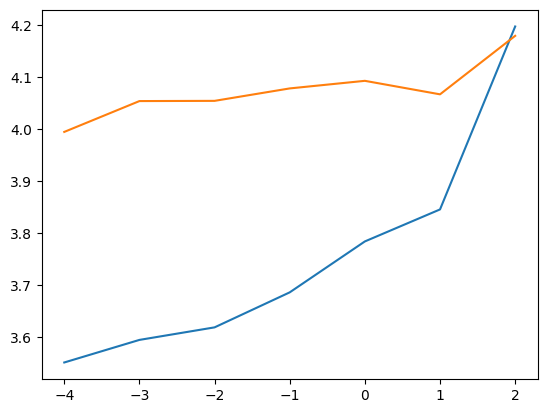

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
score_df = pd.DataFrame({'alpha': alpha_list,
                         'train_score': train_score,
                         'test_score': test_score})
score_df

,alpha,train_score,test_score
0,0.0001,3.550700,3.994600
1,0.0010,3.594157,4.053950
2,0.0100,3.618296,4.054359
3,0.1000,3.685698,4.078312
4,1.0000,3.783747,4.092927
5,10.0000,3.845360,4.066927
6,100.0000,4.197565,4.179552


In [ ]:
score_df['diff'] = score_df['train_score'] - score_df['test_score']

In [ ]:
score_df

,alpha,train_score,test_score,diff
0,0.0001,3.550700,3.994600,-0.443900
1,0.0010,3.594157,4.053950,-0.459793
2,0.0100,3.618296,4.054359,-0.436063
3,0.1000,3.685698,4.078312,-0.392615
4,1.0000,3.783747,4.092927,-0.309179
5,10.0000,3.845360,4.066927,-0.221566
6,100.0000,4.197565,4.179552,0.018013


In [ ]:
# 최적의 알파로 최종 모델
ridge = Ridge(alpha=0.0001)
ridge.fit(X_train_scale, y_train)

print(ridge.score(X_train_scale, y_train))
print(ridge.score(X_test_scale, y_test))

y_train_pred = ridge.predict(X_train_scale)
y_test_pred = ridge.predict(X_test_scale)
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

0.8030843894475233
0.6983861619807248
train RMSE:  3.5507004489726954
test RMSE:  3.99459995028362
train MAE:  2.5396359436875042
test MAE:  2.9704193363532414


## 다항회귀분석 - 라쏘 L1

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:, ['cylinders', 'horsepower', 'weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 3)
y 데이터:  (392,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                      test_size = 0.3,
                                                                      random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 3)
test 데이터:  (118, 3)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식
poly = PolynomialFeatures(degree = 5, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("X_train 데이터: ", X_train.shape)
print("X_train_poly 데이터: ", X_train_poly.shape)

X_train 데이터:  (274, 3)
X_train_poly 데이터:  (274, 55)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train_poly)
X_test_scale = standard.transform(X_test_poly)

In [ ]:
# 라쏘
from sklearn.linear_model import Lasso
lasso = Lasso()
# 모델 훈련
lasso.fit(X_train_scale, y_train)

Lasso()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(lasso.score(X_train_scale, y_train))
print(lasso.score(X_test_scale, y_test))

0.7050729763665712
0.6759693341417214


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = lasso.intercept_;intercept

23.637591240875913

In [ ]:
# 기울기
slope = [round(x, 4) for x in lasso.coef_];print(slope)

[-0.4145, -1.6234, -3.9303, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


In [ ]:
np.sum(lasso.coef_ == 0)
# 전체 55개 중에서 52개 사용하지 않음

52

In [ ]:
X_poly_columns = poly.get_feature_names_out()

In [ ]:
for name, coef in zip(X_poly_columns, slope):
  print("{}: {}".format(name, coef))

cylinders: -0.4145
horsepower: -1.6234
weight: -3.9303
cylinders^2: -0.0
cylinders horsepower: -0.0
cylinders weight: -0.0
horsepower^2: -0.0
horsepower weight: -0.0
weight^2: -0.0
cylinders^3: -0.0
cylinders^2 horsepower: -0.0
cylinders^2 weight: -0.0
cylinders horsepower^2: -0.0
cylinders horsepower weight: -0.0
cylinders weight^2: -0.0
horsepower^3: -0.0
horsepower^2 weight: -0.0
horsepower weight^2: -0.0
weight^3: -0.0
cylinders^4: -0.0
cylinders^3 horsepower: -0.0
cylinders^3 weight: -0.0
cylinders^2 horsepower^2: -0.0
cylinders^2 horsepower weight: -0.0
cylinders^2 weight^2: -0.0
cylinders horsepower^3: -0.0
cylinders horsepower^2 weight: -0.0
cylinders horsepower weight^2: -0.0
cylinders weight^3: -0.0
horsepower^4: -0.0
horsepower^3 weight: -0.0
horsepower^2 weight^2: -0.0
horsepower weight^3: -0.0
weight^4: -0.0
cylinders^5: -0.0
cylinders^4 horsepower: -0.0
cylinders^4 weight: -0.0
cylinders^3 horsepower^2: -0.0
cylinders^3 horsepower weight: -0.0
cylinders^3 weight^2: -0.0
c

In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X_poly_columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 23.637591240875913 + -0.4145 * cylinders + -1.6234 * horsepower + -3.9303 * weight + -0.0 * cylinders^2 + -0.0 * cylinders horsepower + -0.0 * cylinders weight + -0.0 * horsepower^2 + -0.0 * horsepower weight + -0.0 * weight^2 + -0.0 * cylinders^3 + -0.0 * cylinders^2 horsepower + -0.0 * cylinders^2 weight + -0.0 * cylinders horsepower^2 + -0.0 * cylinders horsepower weight + -0.0 * cylinders weight^2 + -0.0 * horsepower^3 + -0.0 * horsepower^2 weight + -0.0 * horsepower weight^2 + -0.0 * weight^3 + -0.0 * cylinders^4 + -0.0 * cylinders^3 horsepower + -0.0 * cylinders^3 weight + -0.0 * cylinders^2 horsepower^2 + -0.0 * cylinders^2 horsepower weight + -0.0 * cylinders^2 weight^2 + -0.0 * cylinders horsepower^3 + -0.0 * cylinders horsepower^2 weight + -0.0 * cylinders horsepower weight^2 + -0.0 * cylinders weight^3 + -0.0 * horsepower^4 + -0.0 * horsepower^3 weight + -0.0 * horsepower^2 weight^2 + -0.0 * horsepower weight^3 + -0.0 * weight^4 + -0.0 * cylinders^5 + -0.0 * cylinder

In [ ]:
y_train_pred = lasso.predict(X_train_scale)
y_test_pred = lasso.predict(X_test_scale)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  4.345414867036591
test RMSE:  4.140384912549389
train MAE:  3.282194698008912
test MAE:  3.3131776458991924


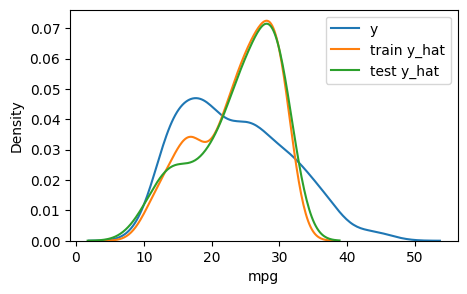

In [ ]:
# 실제값과 예측값 비교
plt.figure(figsize = (5, 3))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_train_pred, label = "train y_hat", ax = ax1)
ax3 = sns.kdeplot(y_test_pred, label = "test y_hat", ax = ax1)
plt.legend()
plt.show()

In [ ]:
# 규제조절 - 결정계수
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train_scale, y_train)
  train_score.append(lasso.score(X_train_scale, y_train))
  test_score.append(lasso.score(X_test_scale, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+01, tolerance: 1.754e

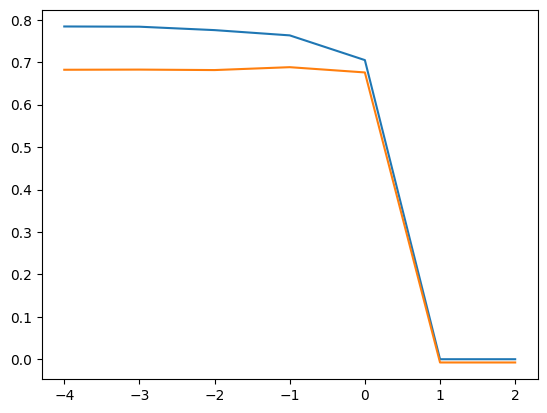

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
score_df = pd.DataFrame({'alpha': alpha_list,
                         'train_score': train_score,
                         'test_score': test_score})
score_df

,alpha,train_score,test_score
0,0.0001,0.784311,0.682303
1,0.0010,0.783782,0.682673
2,0.0100,0.775729,0.681570
3,0.1000,0.763339,0.688366
4,1.0000,0.705073,0.675969
5,10.0000,0.000000,-0.007664
6,100.0000,0.000000,-0.007664


In [ ]:
score_df['diff'] = score_df['train_score'] - score_df['test_score']

In [ ]:
score_df

,alpha,train_score,test_score,diff
0,0.0001,0.784311,0.682303,0.102008
1,0.0010,0.783782,0.682673,0.101109
2,0.0100,0.775729,0.681570,0.094160
3,0.1000,0.763339,0.688366,0.074973
4,1.0000,0.705073,0.675969,0.029104
5,10.0000,0.000000,-0.007664,0.007664
6,100.0000,0.000000,-0.007664,0.007664


In [ ]:
# 규제조절 - RMSE
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train_scale, y_train)
  y_train_pred = lasso.predict(X_train_scale)
  y_test_pred = lasso.predict(X_test_scale)
  train_score.append(mean_squared_error(y_train, y_train_pred, squared = False))
  test_score.append(mean_squared_error(y_test, y_test_pred, squared = False))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+01, tolerance: 1.754e

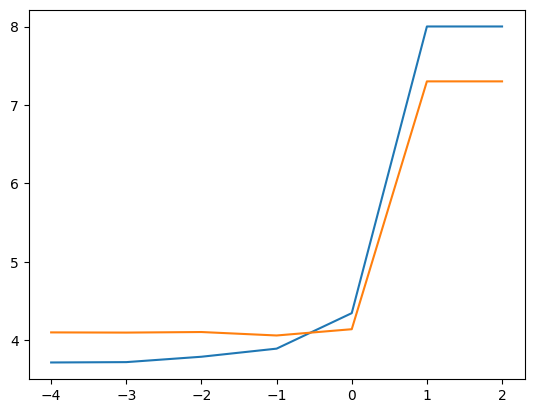

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
score_df = pd.DataFrame({'alpha': alpha_list,
                         'train_score': train_score,
                         'test_score': test_score})
score_df

,alpha,train_score,test_score
0,0.0001,3.716107,4.099719
1,0.0010,3.720659,4.097333
2,0.0100,3.789309,4.104448
3,0.1000,3.892579,4.060410
4,1.0000,4.345415,4.140385
5,10.0000,8.001547,7.301388
6,100.0000,8.001547,7.301388


In [ ]:
score_df['diff'] = score_df['train_score'] - score_df['test_score']

In [ ]:
score_df

,alpha,train_score,test_score,diff
0,0.0001,3.716107,4.099719,-0.383612
1,0.0010,3.720659,4.097333,-0.376674
2,0.0100,3.789309,4.104448,-0.315139
3,0.1000,3.892579,4.060410,-0.167831
4,1.0000,4.345415,4.140385,0.205030
5,10.0000,8.001547,7.301388,0.700159
6,100.0000,8.001547,7.301388,0.700159


In [ ]:
# 최적의 알파로 최종 모델
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scale, y_train)

print(lasso.score(X_train_scale, y_train))
print(lasso.score(X_test_scale, y_test))

y_train_pred = lasso.predict(X_train_scale)
y_test_pred = lasso.predict(X_test_scale)
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

0.7837819978500905
0.6826728458109975
train RMSE:  3.7206591576040955
test RMSE:  4.09733316685455
train MAE:  2.6996128919067024
test MAE:  3.0372597376527417


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(


# 분류 분석

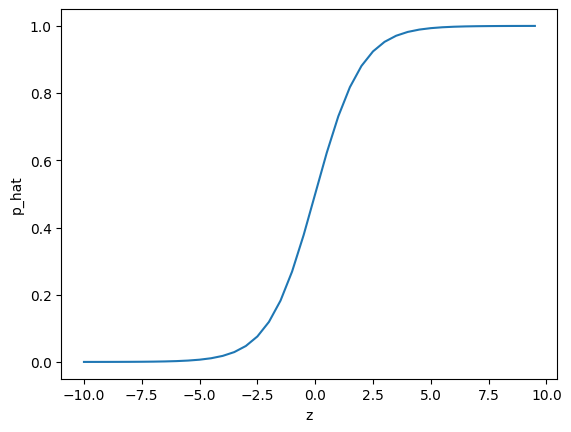

In [ ]:
z = np.arange(-10, 10, 0.5) # x축의 z값을 0.1의 간격으로 표시
p_hat = 1 / (1 + np.exp(-z)) # np.exp 로 지수 함수 계산

plt.plot(z, p_hat)
plt.xlabel('z')
plt.ylabel('p_hat')
plt.show()

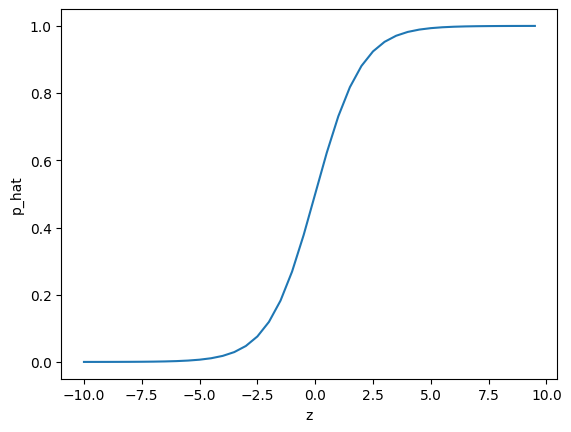

In [ ]:
z = np.arange(-10, 10, 0.5) # x축의 z값을 0.1의 간격으로 표시
p_hat = np.exp(z) / (1 + np.exp(z)) # np.exp 로 지수 함수 계산

plt.plot(z, p_hat)
plt.xlabel('z')
plt.ylabel('p_hat')
plt.show()

## 퀴즈

In [ ]:
TP = 64; FN = 18; FP = 104; TN = 128
# 정확도 = 정분류율
acc = (TP + TN) / (TP + FN + FP + TN)
print("정확도 = 정분류율", acc)
# 오분류율
print("오분류율", 1 - acc)
# 정밀도
# 예측한 것들 중에서 얼마나 잘 맞췄는가 = 모델 정확도
prec = TP / (TP + FP)
print("정밀도", prec)
# 재현율 = 민감도 = 소수집단 정분류율
# 실제 참인 것들 중에서 얼마나 잘 예측(재현)하였는가
reca = TP / (TP + FN)
print("재현율", reca)
# 소수집단 오분류율
print("소수집단 오분류율", 1 - reca)
# 특이도
spec = TN / (FP + TN)
print("특이도", spec)
# f1 점수
f1s = 2 * prec * reca / (prec + reca)
print("f1 점수", f1s)

정확도 = 정분류율 0.6114649681528662
오분류율 0.3885350318471338
정밀도 0.38095238095238093
재현율 0.7804878048780488
소수집단 오분류율 0.2195121951219512
특이도 0.5517241379310345
f1 점수 0.512


## 로지스틱 회귀 분석 - 전체데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/mortgage.xlsx', engine = 'openpyxl')
df.head()
# 담보대출승인여부, 착수금비율, 소득대출비율

,y,x1,x2
0,1,16.35,49.94
1,1,34.43,56.16
2,1,39.19,36.89
3,1,23.58,56.88
4,0,29.92,27.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       30 non-null     int64  
 1   x1      30 non-null     float64
 2   x2      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
df['y'].unique()

array([1, 0])

In [ ]:
df['y'].value_counts()

y
1    17
0    13
Name: count, dtype: int64

In [ ]:
df.columns

Index(['y', 'x1', 'x2'], dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:,['x1', 'x2']]
y = df['y']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (30, 2)
y 데이터:  (30,)


In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression();m1.fit(X, y)

LogisticRegression()

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_[0], 5);intercept1

-9.31469

In [ ]:
# 기울기
slope1 = [round(x, 5) for x in m1.coef_[0]];print(slope1)

[0.13407, 0.17728]


In [ ]:
for name, coef in zip(X.columns, slope1):
  print("{}: {}".format(name, coef))

x1: 0.13407
x2: 0.17728


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)

y_hat = -9.31469 + 0.13407 * x1 + 0.17728 * x2


In [ ]:
# 예측
y_pred1 = m1.predict(X)
y_pred1[:5]

array([1, 1, 1, 1, 0])

In [ ]:
y_pred1_proba = m1.predict_proba(X)
y_pred1_proba[:5]

array([[0.1505, 0.8495],
       [0.0052, 0.9948],
       [0.0773, 0.9227],
       [0.0193, 0.9807],
       [0.6243, 0.3757]])

In [ ]:
m1.classes_

array([0, 1])

In [ ]:
zv = m1.decision_function(X)

In [ ]:
zv[:5]

array([ 1.7306,  5.2573,  2.4794,  3.9302, -0.5079])

In [ ]:
X.head()

,x1,x2
0,16.35,49.94
1,34.43,56.16
2,39.19,36.89
3,23.58,56.88
4,29.92,27.05


In [ ]:
x1 = X['x1'][0];x2 = X['x2'][0]
-9.31469 + 0.13407 * x1 + 0.17728 * x2

1.7307176999999978

In [ ]:
print(y_pred1_proba[:5])
from scipy.special import expit
expit(zv)

[[0.1505 0.8495]
 [0.0052 0.9948]
 [0.0773 0.9227]
 [0.0193 0.9807]
 [0.6243 0.3757]]


array([0.8495, 0.9948, 0.9227, 0.9807, 0.3757, 0.8743, 0.9861, 0.8911,
       0.6339, 0.7016, 0.5346, 0.0837, 0.0631, 0.2251, 0.9123, 0.4579,
       0.9671, 0.8868, 0.9868, 0.227 , 0.029 , 0.066 , 0.9842, 0.1305,
       0.6644, 0.1657, 0.1506, 0.2535, 0.898 , 0.1034])

In [ ]:
# 성능 평가 - 정확도
print(m1.score(X, y))
print(np.mean(y == y_pred1))

0.8666666666666667
0.8666666666666667


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
logit_cm = confusion_matrix(y, y_pred1)
print(logit_cm)

[[11  2]
 [ 2 15]]


In [ ]:
from sklearn.metrics import classification_report
logit_rpt = classification_report(y, y_pred1)
print(logit_rpt)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.88      0.88      0.88        17

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
(0.85 + 0.88) / 2

0.865

In [ ]:
(0.85 * 13 + 0.88 * 17) / 30

0.8669999999999999

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y, y_pred1);print(acc)
pre = precision_score(y, y_pred1);print(pre)
rec = recall_score(y, y_pred1);print(rec)
f1 = f1_score(y, y_pred1);print(f1)

0.8666666666666667
0.8823529411764706
0.8823529411764706
0.8823529411764706


위 0번이 양성클래스

[[11  2]

 [ 2 15]]

In [ ]:
# TP FN
# FP TN

In [ ]:
# 정확도, 정밀도, 재현율, f1점수를 직접 계산하시오.

In [ ]:
# 정확도
acc = (11 + 15) / (11 + 2 + 2 + 15);print(acc)

0.8666666666666667


In [ ]:
# 정밀도 = 위 아래
pre = 11 / (11 + 2);print(pre)

0.8461538461538461


In [ ]:
# 재현율 = 좌 우
rec = 11 / (11 + 2);print(rec)

0.8461538461538461


In [ ]:
# f1 점수
f1 = 2*pre*rec/(pre + rec);print(f1)

0.8461538461538461


아래 1번이 양성클래스

[[11  2]

 [ 2 15]]

In [ ]:
# TN FP
# FN TP

In [ ]:
# 정확도, 정밀도, 재현율, f1점수를 직접 계산하시오.

In [ ]:
# 정확도
acc = (11 + 15) / (11 + 2 + 2 + 15);print(acc)

0.8666666666666667


In [ ]:
# 정밀도 = 위 아래
pre = 15 / (15 + 2);print(pre)

0.8823529411764706


In [ ]:
# 재현율 = 좌 우
rec = 15 / (15 + 2);print(rec)

0.8823529411764706


In [ ]:
# f1 점수
f1 = 2*pre*rec/(pre + rec);print(f1)

0.8823529411764706


In [ ]:
# 문제풀이
x1 = 20; x2 = 30
zv = -9.31469 + 0.13407 * x1 + 0.17728 * x2
print(round(expit(zv), 5))
print(round(np.exp(zv) / (1 + np.exp(zv)),5))
print(round(1 / (1 + np.exp(-zv)),5))

0.21167
0.21167
0.21167


In [ ]:
x1 = 30; x2 = 30
zv = -9.31469 + 0.13407 * x1 + 0.17728 * x2
print(round(expit(zv), 5))
print(round(np.exp(zv) / (1 + np.exp(zv)),5))
print(round(1 / (1 + np.exp(-zv)),5))

0.50645
0.50645
0.50645


## 선형확률모형

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       30 non-null     int64  
 1   x1      30 non-null     float64
 2   x2      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
# 전체 데이터
X = df.loc[:,['x1', 'x2']]
y = df['y']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (30, 2)
y 데이터:  (30,)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m2 = LinearRegression();m2.fit(X, y)

LinearRegression()

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept2 = round(m2.intercept_, 5);print(intercept2)

-0.86815


In [ ]:
# 기울기
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)

[0.0188, 0.0258]


In [ ]:
for name, coef in zip(X.columns, slope2):
  print("{}: {}".format(name, coef))

x1: 0.0188
x2: 0.0258


In [ ]:
# 표본회귀식
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2


In [ ]:
# 예측값
y_pred2 = m2.predict(X)
y_pred2

array([ 0.7299,  1.2312,  0.8231,  1.0453,  0.3943,  0.7541,  1.0849,
        0.7872,  0.5467,  0.5937,  0.4966,  0.1333,  0.0888,  0.294 ,
        0.8069,  0.4381,  0.9597,  0.771 ,  1.0913,  0.292 , -0.0327,
        0.0875,  1.0684,  0.2046,  0.5814,  0.2456,  0.2282,  0.3126,
        0.7805,  0.162 ])

In [ ]:
# 분류값
y_bin = [np.round(x) for x in y_pred2]
y_bin[:5]

[1.0, 1.0, 1.0, 1.0, 0.0]

In [ ]:
# 성능 평가
np.mean(y == y_bin)

0.8333333333333334

In [ ]:
# 문제풀이
x1 = 20; x2 = 30
y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2
print(round(y_hat, 5))

0.28185


In [ ]:
x1 = 30; x2 = 30
y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2
print(round(y_hat, 5))

0.46985


In [ ]:
x1 = [0,5,20,30,50,60]
x2 = 30
n = len(x1)
x1_list = []
x2_list = []
lp_list = []
logit_p_list = []
for i in range(n):
  lp = -0.86815 + 0.0188 * x1[i] + 0.0258 * x2
  logit_y = -9.31469 + 0.13407 * x1[i] + 0.17728 * x2
  logit_p = 1 / (1 + np.exp(-logit_y))
  x1_list.append(x1[i])
  x2_list.append(x2)
  lp_list.append(lp)
  logit_p_list.append(logit_p)

prob_df = pd.DataFrame({'x1': x1_list,
                        'x2': x2_list,
                        'lp': lp_list,
                        'logit_p': logit_p_list})
prob_df

,x1,x2,lp,logit_p
0,0,30,-0.09415,0.018052
1,5,30,-0.00015,0.034692
2,20,30,0.28185,0.211670
3,30,30,0.46985,0.506452
4,50,30,0.84585,0.937451
5,60,30,1.03385,0.982841
